# Convolutional neural network with Keras (CAP5602 Lecture 12)

In this demo, we will train and test a CNN model on the CIFAR10 dataset using Keras.

## 1. Load dataset

The following code snippet will download the data, load it into memory, and convert pixel values to [0, 1].

In [1]:
from keras.datasets import cifar10

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

2022-12-10 12:31:48.210114: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


170498071/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


## 2. Show a few training examples and its label

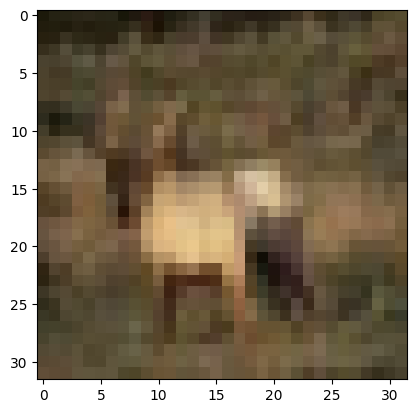

deer


In [2]:
import matplotlib.pyplot as plt

# List of label strings for CIFAR10
label_str = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

img_id = 3
image = X_train[img_id]
label = Y_train[img_id]

plt.imshow(image)
plt.show()
print(label_str[label[0]])

## 3. Convert label vectors into one-hot encodings

In [7]:
from tensorflow.python.keras.utils.all_utils import to_categorical

num_classes = 10
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

print(Y_train.shape, Y_test.shape)

(50000, 10, 10, 10, 10) (10000, 10, 10, 10, 10)


## 4. Define the CNN model

We can add convolutional layers using the Conv2D class and max pooling layer using the MaxPooling2D class. So this CNN model contains:
*   2 convolutional layers (each with 32 3x3 filters)
*   1 max pooling layer with a 2x2 filter
*   The resulting tensor is flattened into a vector
*   The flattened vector is put through an MLP with 1 hidden layer (128 hidden nodes)



In [8]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

## 5. Compile the model

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

## 6. Train the model

In [11]:
model.fit(X_train, Y_train, epochs=30, batch_size=128)

Epoch 1/30


ValueError: in user code:


    ValueError: Shapes (None, 10, 10, 10, 10) and (None, 10) are incompatible


## 7. Evaluate the trained model on test set

In [ ]:
_, accuracy = model.evaluate(X_test, Y_test)

print(accuracy)